In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display, HTML
from pathlib import Path

In [6]:
df = pd.read_csv('data.csv')
df.head()

,person_id,photo_id,age,filepath
0,008,008a,29,../datasets/fg-net/FGNET/images/008A29.JPG
1,039,039a,5,../datasets/fg-net/FGNET/images/039A05.JPG
2,066,066,6,../datasets/fg-net/FGNET/images/066A06b.JPG
3,068,068a,0,../datasets/fg-net/FGNET/images/068A00.JPG
4,056,056a,6,../datasets/fg-net/FGNET/images/056A06.JPG


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  1002 non-null   object
 1   photo_id   1002 non-null   object
 2   age        1002 non-null   int64 
 3   filepath   1002 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


<AxesSubplot:>

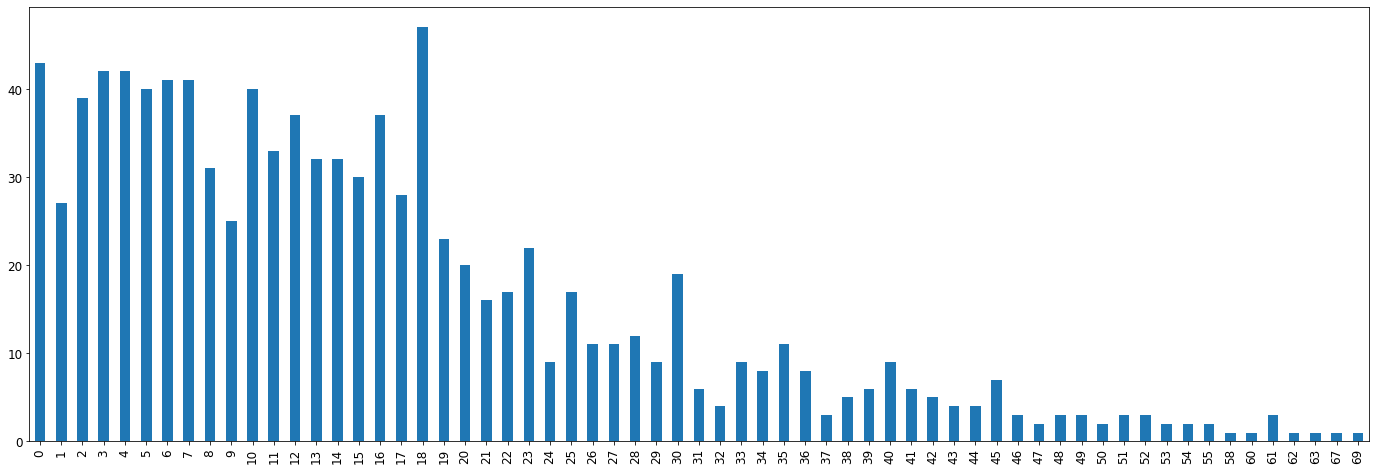

In [8]:
df['age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [9]:
total_cnt, minor_cnt = 0, 0

for age, count in df['age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [10]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  63.87%


In [23]:
samples = df.sample(n=18)
samples.head()

,person_id,photo_id,age,filepath
72,048,048a,15,../datasets/fg-net/FGNET/images/048A15.JPG
823,025,025a,12,../datasets/fg-net/FGNET/images/025A12.JPG
96,023,023a,22,../datasets/fg-net/FGNET/images/023A22.JPG
211,035,035a,8,../datasets/fg-net/FGNET/images/035A08.JPG
60,052,052a,7,../datasets/fg-net/FGNET/images/052A07.JPG


In [28]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['filepath']):
        image = Image.open(image_path).convert('RGB')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image, cmap=None, interpolation='nearest')
        ax.axis('off')  # Turn off axis
    
    plt.show()

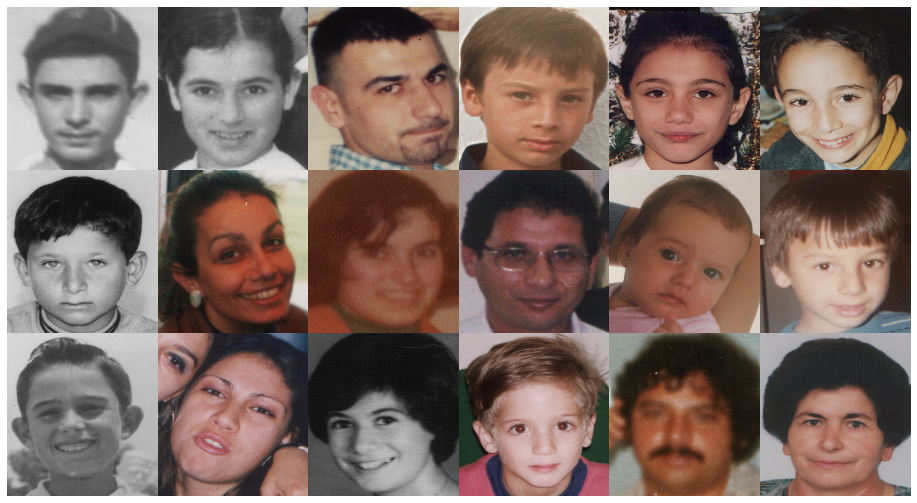

In [29]:
display_image_grid(samples, n_rows=3, n_cols=6)